In [121]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
tqdm.pandas()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [122]:
train_df=pd.read_csv('./Data/train.csv')

In [123]:
train_df.head()

,id,y,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,113.0,19,A,A,-0.140642,-0.388162,-0.574181,-0.583770,-0.376220,...,0.584130,-0.100278,-0.846640,-1.461938,-1.801008,-1.804553,-1.500023,-0.980571,-0.377526,0.168243
1,2,119.0,14,C,A,0.023754,-0.105455,-0.245025,-0.310670,-0.249384,...,-3.024336,-2.480266,-1.118005,0.181451,0.726820,0.401501,-0.356744,-0.913405,-0.854943,-0.193468
2,3,109.0,13,A,A,0.180818,0.135004,0.001879,-0.134548,-0.185928,...,-0.156851,-0.262902,-0.668436,-1.172372,-1.387328,-1.016077,-0.103130,0.935900,1.550512,1.405350
3,4,110.0,18,A,A,-0.234780,-0.094543,0.193084,0.508519,0.668783,...,-1.358540,-0.028478,0.535346,-0.116384,-1.542395,-2.486781,-1.631185,1.481241,6.015514,10.233163
4,5,123.0,32,A,A,-0.130934,-0.360313,-0.547045,-0.603495,-0.508025,...,-0.825535,-0.392556,0.156361,0.567142,0.756362,0.809336,0.844580,0.876423,0.801686,0.524566


In [124]:
columns=[f'ROI{i}-ROI{j}'  for i in range(1,116) for j in range (i+1,117) ]

In [125]:
def get_corr(row,test=False):
    if test:
        brain = np.array(row[4:])
    else:
        brain = np.array(row[5:])
    brain = brain.reshape((116, 115)).astype(float)
    corr = np.corrcoef(brain)
    flat = corr[np.triu_indices(corr.shape[0], 1)]
    return flat.tolist()


In [133]:
corr=train_df.progress_apply(lambda x :get_corr(x),axis=1)

  0%|          | 1/600 [00:01<10:01,  1.00s/it]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 600/600 [00:15<00:00, 39.19it/s]


In [214]:
corr_df=pd.DataFrame(np.array(corr.values.tolist()),columns=columns).fillna(0)



In [135]:
corr_df

,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,ROI1-ROI8,ROI1-ROI9,ROI1-ROI10,ROI1-ROI11,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,0.320408,-0.156421,-0.115766,-0.306091,0.034975,-0.147885,-0.228411,-0.237148,0.020136,0.445899,...,0.006686,-0.285579,-0.072048,0.411215,0.322524,0.208173,-0.071341,0.282784,-0.055727,0.144371
1,0.386406,0.084164,-0.226632,-0.136301,-0.428097,-0.126119,-0.057845,-0.122750,-0.262477,0.594780,...,0.736991,0.147084,-0.159465,0.264405,0.006974,0.009238,0.266661,0.047870,0.112745,0.142081
2,0.809958,0.096828,-0.012295,-0.658145,-0.565232,0.436640,0.163701,-0.528475,-0.458596,0.313225,...,0.200037,0.393775,-0.085829,0.266476,0.340162,-0.142864,0.342046,0.374683,0.281569,-0.166943
3,0.371073,0.340416,0.165785,0.319523,0.071653,-0.006067,0.102873,0.247239,0.153692,0.145438,...,0.711573,0.449607,-0.101063,0.494471,0.630120,0.089310,0.583527,0.391849,0.529610,0.202928
4,0.238808,-0.075542,-0.312048,0.343195,-0.017375,0.279959,-0.206112,0.266237,-0.035437,0.385538,...,0.464747,0.110613,0.242850,0.180382,0.264813,0.369938,0.449401,-0.011589,0.637432,0.323892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.239704,0.334075,-0.133219,0.396904,0.218766,0.401353,-0.211222,0.330301,0.118898,0.499315,...,0.868837,0.570910,0.411275,0.662582,0.576929,0.390116,0.636213,0.414633,0.584703,0.823124
596,0.082087,0.106322,-0.234501,-0.227719,-0.221337,0.428577,-0.541010,0.058470,-0.258668,0.710444,...,0.192933,-0.112865,0.101323,0.343547,0.358325,0.412704,0.412598,0.035520,-0.126774,0.412996
597,0.550363,-0.173623,-0.087052,-0.076264,-0.334513,0.005763,-0.164106,-0.227619,-0.378778,0.688334,...,0.673816,0.309224,0.328117,0.451602,0.389896,0.261399,0.427783,0.504431,0.574561,0.499287
598,0.302419,0.042842,-0.557081,-0.029869,-0.165823,0.216248,-0.262268,0.092553,-0.006392,0.256167,...,0.168198,0.348409,-0.134313,0.081805,0.124225,-0.034212,-0.042134,0.136920,0.025787,-0.288578


In [68]:
#normalized_corr_df=(corr_df-corr_df.mean())/corr_df.std()

In [34]:
# normalized_corr_df=(corr_df-corr_df.min())/(corr_df.max()-corr_df.min())

In [128]:
new_train=corr_df
#new_train['var1']=train_df['var1']
#new_train['y']=train_df['y']

In [215]:
first_cols = train_df.iloc[:, [1,2,3,4]]

In [216]:
new_train = first_cols.join(corr_df)

In [217]:
new_train['var2'].replace({'A':0, 'C':1}, inplace = True)
new_train['var3'].replace({'A':0, 'C':1}, inplace = True)

In [218]:
new_train

,y,var1,var2,var3,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,113.0,19,0,0,0.320408,-0.156421,-0.115766,-0.306091,0.034975,-0.147885,...,0.006686,-0.285579,-0.072048,0.411215,0.322524,0.208173,-0.071341,0.282784,-0.055727,0.144371
1,119.0,14,1,0,0.386406,0.084164,-0.226632,-0.136301,-0.428097,-0.126119,...,0.736991,0.147084,-0.159465,0.264405,0.006974,0.009238,0.266661,0.047870,0.112745,0.142081
2,109.0,13,0,0,0.809958,0.096828,-0.012295,-0.658145,-0.565232,0.436640,...,0.200037,0.393775,-0.085829,0.266476,0.340162,-0.142864,0.342046,0.374683,0.281569,-0.166943
3,110.0,18,0,0,0.371073,0.340416,0.165785,0.319523,0.071653,-0.006067,...,0.711573,0.449607,-0.101063,0.494471,0.630120,0.089310,0.583527,0.391849,0.529610,0.202928
4,123.0,32,0,0,0.238808,-0.075542,-0.312048,0.343195,-0.017375,0.279959,...,0.464747,0.110613,0.242850,0.180382,0.264813,0.369938,0.449401,-0.011589,0.637432,0.323892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,110.0,41,0,0,0.239704,0.334075,-0.133219,0.396904,0.218766,0.401353,...,0.868837,0.570910,0.411275,0.662582,0.576929,0.390116,0.636213,0.414633,0.584703,0.823124
596,120.0,64,0,0,0.082087,0.106322,-0.234501,-0.227719,-0.221337,0.428577,...,0.192933,-0.112865,0.101323,0.343547,0.358325,0.412704,0.412598,0.035520,-0.126774,0.412996
597,96.0,27,0,0,0.550363,-0.173623,-0.087052,-0.076264,-0.334513,0.005763,...,0.673816,0.309224,0.328117,0.451602,0.389896,0.261399,0.427783,0.504431,0.574561,0.499287
598,118.0,29,1,0,0.302419,0.042842,-0.557081,-0.029869,-0.165823,0.216248,...,0.168198,0.348409,-0.134313,0.081805,0.124225,-0.034212,-0.042134,0.136920,0.025787,-0.288578


In [74]:
new_train['mean']=np.mean(new_train.iloc[:,4:],axis=1)

In [75]:
new_train['max']=np.max(new_train.iloc[:,4:],axis=1)

In [76]:
new_train['min']=np.min(new_train.iloc[:,4:],axis=1)

In [140]:
new_train

,y,var1,var2,var3,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,113.0,19,0,0,0.320408,-0.156421,-0.115766,-0.306091,0.034975,-0.147885,...,0.006686,-0.285579,-0.072048,0.411215,0.322524,0.208173,-0.071341,0.282784,-0.055727,0.144371
1,119.0,14,1,0,0.386406,0.084164,-0.226632,-0.136301,-0.428097,-0.126119,...,0.736991,0.147084,-0.159465,0.264405,0.006974,0.009238,0.266661,0.047870,0.112745,0.142081
2,109.0,13,0,0,0.809958,0.096828,-0.012295,-0.658145,-0.565232,0.436640,...,0.200037,0.393775,-0.085829,0.266476,0.340162,-0.142864,0.342046,0.374683,0.281569,-0.166943
3,110.0,18,0,0,0.371073,0.340416,0.165785,0.319523,0.071653,-0.006067,...,0.711573,0.449607,-0.101063,0.494471,0.630120,0.089310,0.583527,0.391849,0.529610,0.202928
4,123.0,32,0,0,0.238808,-0.075542,-0.312048,0.343195,-0.017375,0.279959,...,0.464747,0.110613,0.242850,0.180382,0.264813,0.369938,0.449401,-0.011589,0.637432,0.323892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,110.0,41,0,0,0.239704,0.334075,-0.133219,0.396904,0.218766,0.401353,...,0.868837,0.570910,0.411275,0.662582,0.576929,0.390116,0.636213,0.414633,0.584703,0.823124
596,120.0,64,0,0,0.082087,0.106322,-0.234501,-0.227719,-0.221337,0.428577,...,0.192933,-0.112865,0.101323,0.343547,0.358325,0.412704,0.412598,0.035520,-0.126774,0.412996
597,96.0,27,0,0,0.550363,-0.173623,-0.087052,-0.076264,-0.334513,0.005763,...,0.673816,0.309224,0.328117,0.451602,0.389896,0.261399,0.427783,0.504431,0.574561,0.499287
598,118.0,29,1,0,0.302419,0.042842,-0.557081,-0.029869,-0.165823,0.216248,...,0.168198,0.348409,-0.134313,0.081805,0.124225,-0.034212,-0.042134,0.136920,0.025787,-0.288578


In [141]:
new_train.groupby('y').size().sort_values(ascending=False)

y
100.0    24
113.0    20
109.0    19
119.0    18
108.0    17
         ..
112.5     1
114.5     1
115.5     1
121.5     1
148.0     1
Length: 99, dtype: int64

In [142]:
new_train=new_train.groupby('y').mean().reset_index()

In [143]:
new_train

,y,var1,var2,var3,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,41.0,16.0,0.0,0.0,0.351776,0.090320,-0.305664,-0.005851,-0.375326,0.234046,...,0.666318,0.125899,0.356821,0.463306,0.429428,0.578428,0.541542,0.269060,0.408063,0.503399
1,65.0,38.0,0.0,0.0,0.111951,-0.126279,-0.334451,-0.097180,-0.312959,0.108186,...,0.126255,0.089658,-0.024179,-0.242846,0.271416,0.073239,-0.414840,0.315913,0.060164,0.253529
2,72.0,22.0,0.0,0.0,0.455979,-0.302877,-0.178960,-0.126947,-0.153894,0.184298,...,0.753916,0.577743,0.159927,0.204075,0.736824,0.270574,0.343185,0.609286,0.404955,0.418586
3,73.0,15.0,0.0,1.0,0.464130,-0.177949,-0.228984,0.056070,0.113570,-0.180182,...,0.247080,0.418399,0.034812,0.043066,0.082793,-0.193372,-0.090236,0.336810,0.216084,0.011768
4,75.0,15.0,0.0,0.0,0.648708,0.041617,0.422122,0.218517,-0.010028,0.198131,...,0.251380,0.480733,-0.041561,-0.119244,0.243030,0.092524,0.197212,0.302225,0.111809,-0.008902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,141.0,15.0,0.0,0.0,0.450514,-0.176912,-0.289311,0.363313,0.028418,-0.204318,...,0.585746,0.130304,-0.150247,-0.102222,0.030636,-0.053812,-0.117922,0.477598,0.278899,0.499614
95,142.0,9.0,0.0,0.5,0.045429,-0.047345,-0.230363,0.001688,-0.100862,-0.056084,...,0.200299,0.135471,0.063377,0.174490,0.281196,0.383178,0.076434,0.463511,0.146633,0.341687
96,144.0,10.0,0.0,1.0,0.614106,0.012456,0.162522,0.084736,0.017662,0.028986,...,0.634226,0.076337,-0.089087,0.257749,0.160127,-0.181966,0.275674,0.311404,0.187823,0.307101
97,147.5,9.0,0.0,0.0,0.584411,-0.183500,-0.094689,-0.250299,-0.145261,-0.207451,...,0.367257,0.432392,-0.038554,0.075890,0.380084,-0.211538,-0.136067,0.389767,0.278863,0.577098


# Train

## Linear Regession

In [156]:
reg = LinearRegression()

In [219]:
X_train, X_test, y_train, y_test = train_test_split(new_train.drop(columns='y'), new_train['y'], test_size=0.25, random_state=42)

In [158]:
reg.fit(X_train,y_train)

LinearRegression()

In [159]:
y_pred=reg.predict(X_test)

In [160]:
mean_squared_error(y_test, y_pred,squared=False)

22.49950442187678

## SVR

In [178]:
params = [{'kernel' : ['poly'],
        'C' : [1,5,10],
        'degree' : [1,2,3,4]}]
        #'coef0' : [0.01,10,0.5],
        #'gamma' : ('auto','scale')}]


In [179]:
svr_reg=SVR()
grids = GridSearchCV(svr_reg,params,cv=3,verbose=5,n_jobs=-1)
grids.fit(X_train,y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10], 'degree': [1, 2, 3, 4],
                          'kernel': ['poly']}],
             verbose=5)

In [180]:
grids.best_params_

{'C': 1, 'degree': 1, 'kernel': 'poly'}

In [181]:
y_pred=grids.predict(X_test)

In [182]:
mean_squared_error(y_test, y_pred,squared=False)

23.623789334589283

In [203]:
#retrain on all dataset
svr_reg=SVR(C=1, degree= 1, kernel= 'poly')
svr_reg.fit(new_train.drop(columns='y'),new_train['y'])

SVR(C=1, degree=1, kernel='poly')

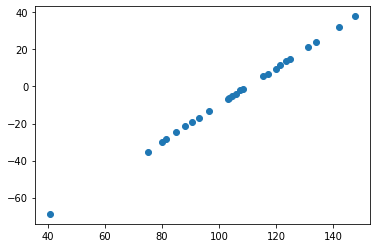

In [184]:
plt.scatter(y_test,y_test-y_pred,)

In [98]:
y_pred=svr_reg.predict(X_test)

In [99]:
mean_squared_error(y_test, y_pred,squared=False)

23.125987548671535

In [185]:
svr_reg_poly=SVR(kernel='poly',degree=2)
svr_reg_poly.fit(X_train,y_train)
y_pred=svr_reg_poly.predict(X_test)
print(mean_squared_error(y_test, y_pred,squared=False))

23.53706018033769


In [59]:
svr_reg_poly.fit(new_train.drop(columns='y'),new_train['y'])

SVR(degree=2, kernel='poly')

## K-neigbors regression

In [186]:
from sklearn.neighbors import KNeighborsRegressor

In [187]:
for k in range(30,45):
    neigh = KNeighborsRegressor(n_neighbors=k,weights='distance').fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    print(k,mean_squared_error(y_test, y_pred,squared=False))

30 23.921971401422184
31 23.901508063828814
32 23.740910220910465
33 23.403373106943356
34 23.39343733342889
35 23.42010847517405
36 23.419242585896022
37 23.191144793280046
38 23.1607567006584
39 23.306664949225418
40 23.39421270181323
41 23.47987947504297
42 23.490200531689602
43 23.439731632038836
44 23.264180615004022


In [91]:
neigh = KNeighborsRegressor(n_neighbors=33,weights='distance',p=2).fit(X_train, y_train)

In [92]:
y_pred=neigh.predict(X_test)

In [93]:
mean_squared_error(y_test, y_pred,squared=False)

23.426081939166934

In [94]:
neigh = KNeighborsRegressor(n_neighbors=33,weights='distance',p=2).fit(new_train.drop(columns='y'),new_train['y'])

In [95]:
y_pred=neigh.predict(X_test)

In [96]:
mean_squared_error(y_test, y_pred,squared=False)

2.2936900216481114e-05

## Elastic net

In [220]:
from sklearn.linear_model import ElasticNetCV

regr = ElasticNetCV(cv=3, random_state=0)

regr.fit(X_train,y_train)


ElasticNetCV(cv=3, random_state=0)

In [221]:
y_pred=regr.predict(X_test)

In [222]:
mean_squared_error(y_test, y_pred,squared=False)

15.200695629313545

# Test 

In [188]:
test_df=pd.read_csv('./Data/test.csv')

In [189]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [190]:
corr_test=test_df.progress_apply(lambda row:get_corr(row,test=True),axis=1)

  1%|          | 1/199 [00:00<00:56,  3.52it/s]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 199/199 [00:04<00:00, 49.66it/s]


In [191]:
test_final_df=pd.DataFrame(np.array(corr_test.values.tolist()),columns=columns).fillna(0)

In [107]:
#normalized_corr_df_test=(test_final_df-test_final_df.mean())/test_final_df.std()

In [108]:
test_final_df

,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,ROI1-ROI8,ROI1-ROI9,ROI1-ROI10,ROI1-ROI11,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,0.574820,-0.184674,0.335784,-0.433897,-0.314960,0.121238,-0.304749,-0.360175,-0.213842,0.592588,...,0.188771,0.237508,0.273457,0.225723,-0.060189,0.135940,-0.068397,0.239504,0.221618,-0.186755
1,0.459187,0.091974,-0.012738,0.018270,-0.144327,0.286588,-0.024430,0.003806,-0.102631,-0.192910,...,0.395746,-0.245494,0.173441,0.203784,-0.069734,0.214056,0.230202,0.037493,0.031108,0.125471
2,0.318010,0.118248,-0.275287,0.067088,0.031507,-0.158764,-0.122662,0.233291,0.070906,0.441458,...,0.656703,0.428289,0.123900,0.090384,0.504827,0.382075,0.136943,0.402817,0.237602,0.293227
3,0.405577,-0.424435,-0.260486,-0.053301,0.118364,-0.187334,-0.161422,-0.307382,-0.090365,0.439814,...,0.560449,0.255396,-0.304971,-0.070677,0.186580,-0.116094,0.077223,0.041814,-0.004182,0.266954
4,0.531680,0.145877,-0.131794,0.361544,0.015393,0.055204,-0.210112,0.204085,0.027663,0.721721,...,0.003357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.217994,0.204179,-0.118850,0.250223,0.456717,-0.195145,-0.325952,-0.053743,-0.012564,0.794479,...,0.218118,0.021160,0.018531,0.039184,-0.006917,-0.157338,-0.094451,0.751545,0.652086,0.765714
195,0.465376,0.038288,-0.065834,-0.123540,-0.223827,0.372467,-0.039882,-0.101934,-0.115844,0.628183,...,0.453787,0.121769,0.407962,0.322393,0.502507,0.234785,0.260871,0.272752,0.113825,0.565614
196,0.320433,-0.058686,-0.264435,-0.292921,-0.012648,-0.363793,-0.426708,0.040388,-0.286963,0.561433,...,0.072454,-0.090642,0.058275,0.047026,0.451872,0.040126,0.278858,0.593402,0.321660,0.652692
197,0.550265,-0.386250,-0.283560,0.059427,0.095853,-0.092002,0.283123,0.147292,-0.060154,0.400976,...,0.114647,0.535039,0.289765,0.529971,0.317849,0.188834,-0.064073,0.547437,0.426339,0.495522


In [109]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061


In [192]:
first_cols_test = test_df.iloc[:, [1,2,3]]
new_test = first_cols_test.join(normalized_corr_df_test)
new_test['var2'].replace({'A':0, 'C':1}, inplace = True)
new_test['var3'].replace({'A':0, 'C':1}, inplace = True)

In [193]:
new_test

,var1,var2,var3,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,ROI1-ROI8,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,32,0,0,0.854176,-1.020147,1.864560,-1.721855,-1.069154,0.186898,-0.896962,...,-1.141650,-0.026179,0.681606,0.446590,-1.592575,0.019245,-0.884480,-0.490194,-0.008778,-2.175748
1,11,1,0,0.282427,0.179774,0.442699,0.237340,-0.241023,0.893571,0.318030,...,-0.143382,-2.177311,0.199929,0.349797,-1.636280,0.377658,0.482896,-1.314534,-0.736005,-1.034840
2,17,0,1,-0.415623,0.293733,-0.628416,0.448865,0.612347,-1.009774,-0.107739,...,1.115244,0.823498,-0.038657,-0.150514,0.994522,1.148562,0.055833,0.176230,0.052239,-0.421842
3,17,0,1,0.017353,-2.060074,-0.568036,-0.072772,1.033885,-1.131877,-0.275737,...,0.651000,0.053489,-2.104100,-0.861101,-0.462669,-1.137136,-0.217642,-1.296901,-0.870719,-0.517845
4,16,0,1,0.640871,0.413572,-0.043011,1.724712,0.534138,-0.095318,-0.486773,...,-2.035928,-1.083962,-0.635361,-0.549281,-1.316980,-0.604474,-0.571270,-1.467529,-0.854753,-1.493323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,20,0,1,-0.910154,0.666450,0.009796,1.242370,2.676010,-1.165259,-0.988860,...,-1.000106,-0.989723,-0.546118,-0.376407,-1.348651,-1.326373,-1.003789,1.599268,1.634438,1.304677
195,24,0,1,0.313027,-0.053079,0.226083,-0.377109,-0.626859,1.260601,0.251055,...,0.136552,-0.541645,1.329381,0.873091,0.983898,0.472766,0.623338,-0.354521,-0.420251,0.573490
196,24,0,1,-0.403646,-0.473689,-0.584146,-1.111021,0.398049,-1.886028,-1.425569,...,-1.702665,-1.487650,-0.354707,-0.341808,0.752052,-0.420370,0.705709,0.953942,0.373112,0.891682
197,29,1,1,0.732765,-1.894450,-0.662169,0.415669,0.924637,-0.724449,1.651059,...,-1.499161,1.298924,0.760146,1.788906,0.138388,0.261933,-0.864682,0.766376,0.772700,0.317366


In [112]:
new_test['mean']=np.mean(new_test.iloc[:,3:],axis=1)

In [113]:
new_test['min']=np.min(new_test.iloc[:,4:],axis=1)
new_test['max']=np.max(new_test.iloc[:,4:],axis=1)

In [115]:
new_test

,var1,var2,var3,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,ROI1-ROI8,...,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116,mean,min,max
0,32,0,0,0.854176,-1.020147,1.864560,-1.721855,-1.069154,0.186898,-0.896962,...,0.446590,-1.592575,0.019245,-0.884480,-0.490194,-0.008778,-2.175748,-0.015626,-4.607065,3.548730
1,11,1,0,0.282427,0.179774,0.442699,0.237340,-0.241023,0.893571,0.318030,...,0.349797,-1.636280,0.377658,0.482896,-1.314534,-0.736005,-1.034840,-0.023734,-3.500945,3.230425
2,17,0,1,-0.415623,0.293733,-0.628416,0.448865,0.612347,-1.009774,-0.107739,...,-0.150514,0.994522,1.148562,0.055833,0.176230,0.052239,-0.421842,0.010251,-3.165788,4.052801
3,17,0,1,0.017353,-2.060074,-0.568036,-0.072772,1.033885,-1.131877,-0.275737,...,-0.861101,-0.462669,-1.137136,-0.217642,-1.296901,-0.870719,-0.517845,-0.013695,-3.135288,3.808898
4,16,0,1,0.640871,0.413572,-0.043011,1.724712,0.534138,-0.095318,-0.486773,...,-0.549281,-1.316980,-0.604474,-0.571270,-1.467529,-0.854753,-1.493323,-0.005802,-3.355427,3.645788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,20,0,1,-0.910154,0.666450,0.009796,1.242370,2.676010,-1.165259,-0.988860,...,-0.376407,-1.348651,-1.326373,-1.003789,1.599268,1.634438,1.304677,-0.008625,-4.064658,3.092875
195,24,0,1,0.313027,-0.053079,0.226083,-0.377109,-0.626859,1.260601,0.251055,...,0.873091,0.983898,0.472766,0.623338,-0.354521,-0.420251,0.573490,-0.001298,-4.166565,2.851944
196,24,0,1,-0.403646,-0.473689,-0.584146,-1.111021,0.398049,-1.886028,-1.425569,...,-0.341808,0.752052,-0.420370,0.705709,0.953942,0.373112,0.891682,0.006870,-3.940358,4.081513
197,29,1,1,0.732765,-1.894450,-0.662169,0.415669,0.924637,-0.724449,1.651059,...,1.788906,0.138388,0.261933,-0.864682,0.766376,0.772700,0.317366,0.008879,-3.499295,3.175915


In [204]:
y_pred_test=svr_reg.predict(new_test)

(array([ 6., 11., 39., 59., 41., 26., 10.,  3.,  2.,  2.]),
 array([105.7495181 , 106.49341147, 107.23730484, 107.9811982 ,
        108.72509157, 109.46898494, 110.2128783 , 110.95677167,
        111.70066504, 112.4445584 , 113.18845177]),
 <BarContainer object of 10 artists>)

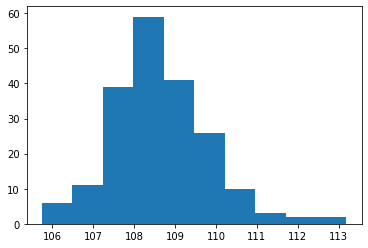

In [210]:
plt.hist(y_pred_test)

In [206]:
df_leaderboard=pd.DataFrame({'id':test_df['id'],'target':y_pred_test})

In [207]:
df_leaderboard

,id,target
0,17,109.697834
1,19,107.943775
2,25,109.759519
3,32,108.930233
4,33,108.414670
...,...,...
194,777,109.780622
195,783,108.145710
196,784,109.985433
197,792,110.108989


In [44]:
df_leaderboard

,id,target
0,17,110.158718
1,19,107.920292
2,25,108.159483
3,32,104.923576
4,33,106.752830
...,...,...
194,777,113.772811
195,783,112.309465
196,784,113.409241
197,792,114.279185


In [208]:
df_leaderboard.to_csv('G14_08',index=False)

In [ ]:
tuning_params=[{'n_neighbors':[range(1,45,2)],
                'weights':['uniform','distance'],
                'p':[1,2,4,6]}]
neigh_r=NearestNeighbors()
grids = GridSearchCV(neigh_r,tuning_params,cv=3,verbose=5,n_jobs=-1)
grids.fit(X_train,y_train)
grids.best_params_               


In [201]:
y_test

62    115.5
40    103.5
95    142.0
18     88.0
97    147.5
84    131.0
64    117.0
42    104.5
10     80.0
0      41.0
31     96.5
76    125.0
47    107.5
26     93.0
44    106.0
4      75.0
22     90.5
12     81.5
88    134.0
73    123.5
49    108.5
70    121.5
68    120.0
15     85.0
39    103.0
Name: y, dtype: float64